# EDA

### Additional Data Enhancements
These columns were added using excel and some research

- **Coach**: Identifies the head coach for each team during the match.
- **CoachChange**: Binary indicator (0 = No, 1 = Yes) showing whether a coaching change occurred before the match.
- **Change_Timing**: Categorizes coaching changes as Before Season, Mid Season, or Late Season to differentiate when the transition happened.
- **Team_Strength & Opponent_Strength**: Squad values used as a proxy for team quality.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/alesandro/Downloads/matches_corrected.csv"
df = pd.read_csv(file_path)

### BASIC DATA CHECKS ###
# Display basic info
print("Dataset Info:")
df.info()

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         760 non-null    int64  
 1   Date               760 non-null    object 
 2   Time               760 non-null    object 
 3   Comp               760 non-null    object 
 4   Round              760 non-null    object 
 5   Day                760 non-null    object 
 6   Venue              760 non-null    object 
 7   Result             760 non-null    object 
 8   GF                 760 non-null    int64  
 9   GA                 760 non-null    int64  
 10  Opponent           760 non-null    object 
 11  xG                 760 non-null    float64
 12  xGA                760 non-null    float64
 13  Poss               760 non-null    int64  
 14  Attendance         760 non-null    int64  
 15  Captain            760 non-null    object 
 16  Formation   

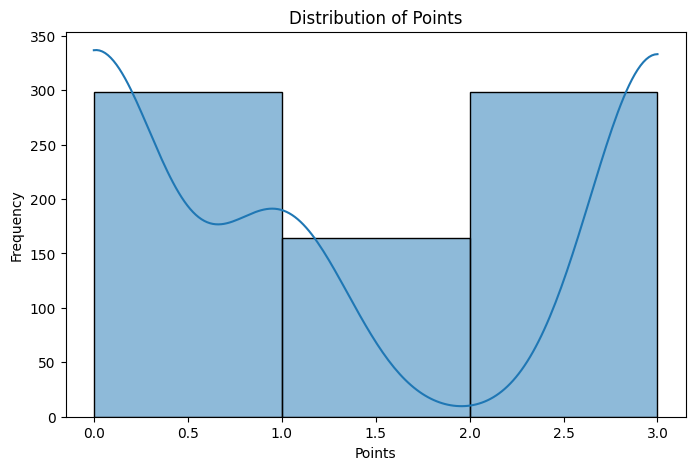

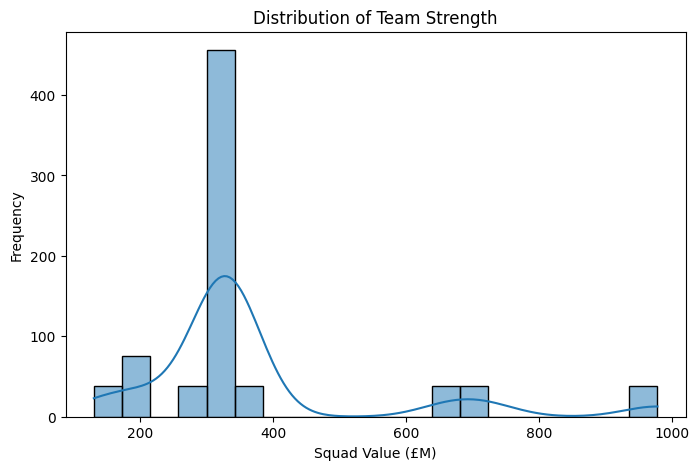

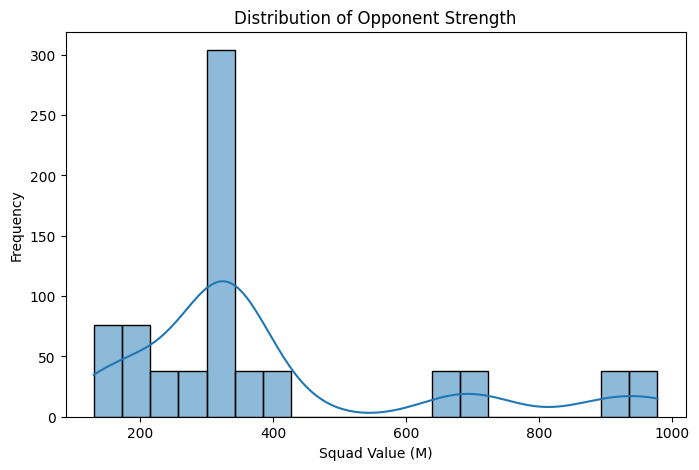

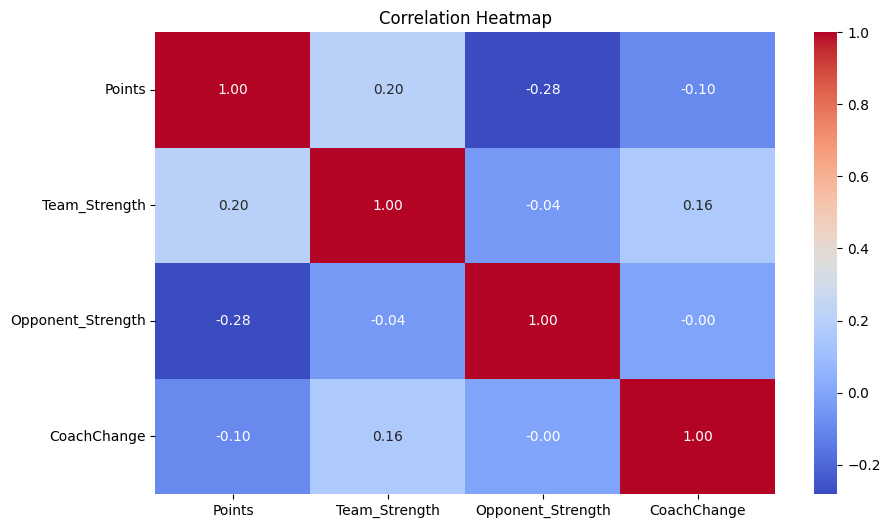

<positron-console-cell-3>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



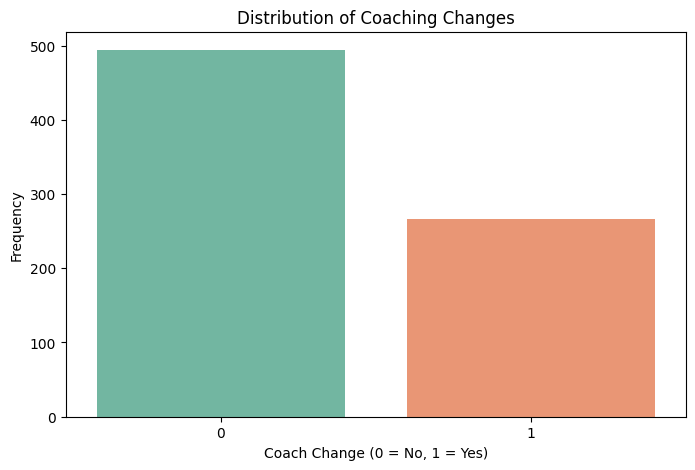

<positron-console-cell-3>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



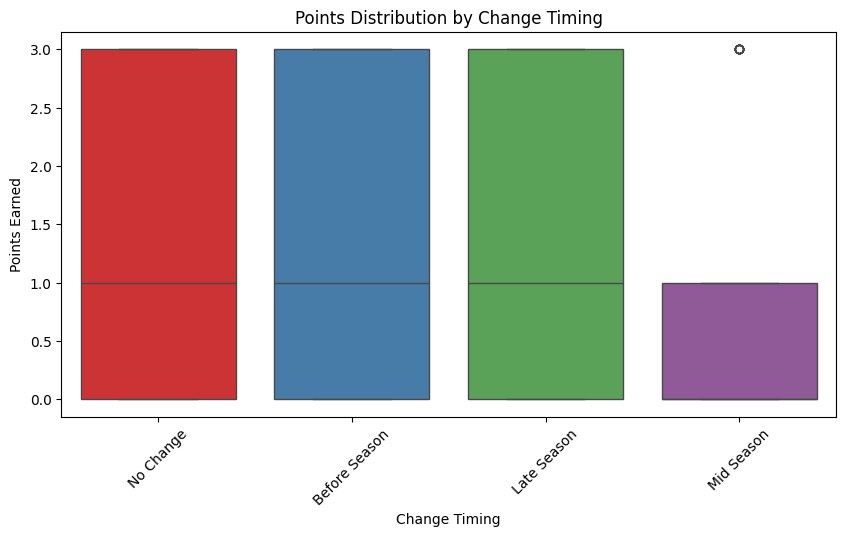

In [3]:
### DISTRIBUTION PLOTS ###
# Points Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Points"], bins=3, kde=True)
plt.title("Distribution of Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

# Team Strength Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Team_Strength"], bins=20, kde=True)
plt.title("Distribution of Team Strength")
plt.xlabel("Squad Value (£M)")
plt.ylabel("Frequency")
plt.show()

# Opponent Strength Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Opponent_Strength"], bins=20, kde=True)
plt.title("Distribution of Opponent Strength")
plt.xlabel("Squad Value (M)")
plt.ylabel("Frequency")
plt.show()

### CORRELATION ANALYSIS ###
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Points", "Team_Strength", "Opponent_Strength", "CoachChange"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### CATEGORICAL ANALYSIS ###
# Countplot for Coaching Changes
plt.figure(figsize=(8, 5))
sns.countplot(x="CoachChange", data=df, palette="Set2")
plt.title("Distribution of Coaching Changes")
plt.xlabel("Coach Change (0 = No, 1 = Yes)")
plt.ylabel("Frequency")
plt.show()

# Points by Change Timing
plt.figure(figsize=(10, 5))
sns.boxplot(x="Change_Timing", y="Points", data=df, palette="Set1")
plt.title("Points Distribution by Change Timing")
plt.xlabel("Change Timing")
plt.ylabel("Points Earned")
plt.xticks(rotation=45)
plt.show()

- The **points distribution** confirms the expected trimodal pattern (0, 1, and 3 points), which aligns with how points are awarded in the Premier League.

- **Team strength and opponent strength distributions** show a right-skewed pattern, meaning a few teams have significantly higher squad values. Most teams fall within a mid-range, which supports using squad value as a proxy for team quality.

- The **correlation heatmap** suggests that team strength has a moderate positive correlation (~0.20) with points, meaning stronger teams tend to perform better. Opponent strength has a negative correlation (~-0.28) with points, indicating tougher opponents make it harder to earn points. CoachChange has a weak negative correlation (~-0.10) with points, suggesting that a coaching change alone does not dramatically impact performance.

- The **distribution of coaching changes** shows that most matches occurred without a coaching change (~500), while ~300 had a coaching change beforehand. This highlights that coaching changes are relatively rare in the dataset.

- The **points distribution by change timing** suggests that teams making mid-season coaching changes tend to perform worse, with a lower median number of points. Before-season and late-season changes appear to have a more balanced performance distribution.

- Overall, the data indicates that team and opponent strength are stronger predictors of performance than coaching changes. Coaching changes may be a response to poor performance rather than a true intervention that improves outcomes. **Also, I might have to work on this dataset. I had to add some columns in excel, which might need some more work to accurately reflect what I'm trying to show. I'll have to talk to someone to see if my additons make sense.**

